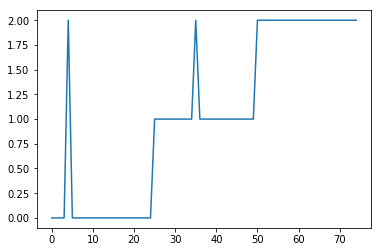

In [4]:
##########################################
## Made by : HERO Kwon
## Title : TER
## Version : v0
## Date : 2018.05.29.
## Description : TER-RM Algorithm
##########################################


# Main

# packages

import numpy as np
import pandas as pd
import scipy as sp
import os
import re
import imageio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
import time

from sklearn.datasets import load_iris
 
data = load_iris()
data_v = data['data']
data_l = data['target']

data_train = np.array([]).reshape(0,4)
data_test = np.array([]).reshape(0,4)
label_train = np.array([])
label_test = np.array([])

for target in list(set(data['target'])):
    v_train, v_test = train_test_split(data_v[data_l==target],test_size = 0.5)
    l_train = np.full(shape=len(v_train),fill_value=target)
    l_test = np.full(shape=len(v_test),fill_value=target)
    data_train = np.concatenate((data_train,v_train))
    data_test = np.concatenate((data_test,v_test))
    label_train = np.concatenate((label_train,l_train))
    label_test = np.concatenate((label_test,l_test))

## TER Algorithm
# Basis : RM2
def RMmodel(order,X):
    m,l = X.shape
    
    M1 = []
    M2 = []
    M3 = []
    MM1 = []
    MM3 = []

    Msum = np.sum(X,axis=1)

    for i in range(order):
        for k in range(l):
            M1.append(X[:,k]**(i+1))
            if (i>0):
                M3.append(X[:,k]*Msum**(i)) 
        M2.append(Msum**(i+1))
        MM1.append(M1)
        if (i>0):
            MM3.append(M3)

    MM1 = np.array(MM1).T
    MM1 = MM1.reshape((m,-1,1)).squeeze(axis=2)
    M2 = np.array(M2).T
    if (len(MM3)):
        MM3 = np.array(MM3).T
        MM3 = MM3.reshape((m,-1,1)).squeeze(axis=2)
        P = np.concatenate((np.ones((m,1)),MM1,M2,MM3),axis=1)
    else : P = np.concatenate((np.ones((m,1)),MM1,M2),axis=1)

    return(P)

def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=Y[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=Y[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.dot(first_eq,second_eq)

        alpha.append(ak)
    return(np.array(alpha).T)

alpha = TERmodel(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
plt.plot(yt1)

In [2]:
plt.show()

In [3]:
%matplotlib inline

In [6]:
label_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2.])

In [7]:
yt1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
np.equal(label_test,yt1)

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [14]:
a = np.equal(label_test,yt1)

In [15]:
np.count_nonzero(a)

73

In [16]:
len(a)

75

In [17]:
np.count_nonzero(a) / len(a)

0.9733333333333334

In [18]:
X,Y = data_train,label_train

In [21]:
P = RMmodel(6,X)

In [30]:
mk_n = X[Y!=0].shape[0]

In [25]:
mk_p = X[Y==0].shape[0]

In [26]:
mk_n = X[Y!=0]

In [29]:
mk_n.shape[0]

50

In [31]:
w_n = 1/mk_n

In [32]:
w_n

0.02

In [33]:
w_n = 1/mk_n
w_p = 1/mk_p

In [42]:
np.diag((mk_n,mk_n))

array([[50,  0],
       [ 0, 50]])

In [47]:
np.fill_diagonal(ones,5)

NameError: name 'ones' is not defined

In [45]:
mk_n

50

In [53]:
a = np.zeros((len(Y), len(Y)), float)

In [57]:
np.fill_diagonal(a,np.ones(len(Y)))

In [58]:
a

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [55]:
len(Y)

75

In [60]:
np.ones(mk_n)*(1/mk_n)

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [61]:
np.ones(mk_p)*(1/mk_p)

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04])

In [64]:
np.concatenate((np.ones(mk_n)*(1/mk_n),np.ones(mk_p)*(1/mk_p)))

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])

In [65]:

ones_mkn = np.ones(mk_n)*w_n
ones_mkp = np.ones(mk_p)*w_p
#np.concatenate((ones_mkn,ones_mkp))

W = np.zeros((len(Y), len(Y)), float)
np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))

In [66]:
W

array([[0.02, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.04]])

In [72]:
yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T

In [68]:
r,n = 0.1,0.2

In [74]:
ak = (P.T).dot(W).dot(P)

In [75]:
ak = (P.T).dot(W).dot(P).T.dot(P.T).dot(W).dot(yk)

In [76]:
ak

array([2.31994249e+13, 1.54421980e+14, 1.54421980e+14, 1.54421980e+14,
       1.54421980e+14, 1.54421980e+14, 1.54421980e+14, 6.96261831e+13,
       6.96261831e+13, 6.96261831e+13, 6.96261831e+13, 6.96261831e+13,
       6.96261831e+13, 1.27417913e+14, 1.27417913e+14, 1.27417913e+14,
       1.27417913e+14, 1.27417913e+14, 1.27417913e+14, 4.47305322e+13,
       4.47305322e+13, 4.47305322e+13, 4.47305322e+13, 4.47305322e+13,
       4.47305322e+13, 1.03802231e+15, 1.03802231e+15, 1.03802231e+15,
       1.03802231e+15, 1.03802231e+15, 1.03802231e+15, 2.11460569e+14,
       2.11460569e+14, 2.11460569e+14, 2.11460569e+14, 2.11460569e+14,
       2.11460569e+14, 7.19067231e+14, 7.19067231e+14, 7.19067231e+14,
       7.19067231e+14, 7.19067231e+14, 7.19067231e+14, 9.02594339e+13,
       9.02594339e+13, 9.02594339e+13, 9.02594339e+13, 9.02594339e+13,
       9.02594339e+13, 7.04216986e+15, 7.04216986e+15, 7.04216986e+15,
       7.04216986e+15, 7.04216986e+15, 7.04216986e+15, 6.49485120e+14,
      

In [77]:
ak.shape

(251,)

In [78]:
yk.shape

(75,)

In [79]:
P.shape

(75, 251)

In [80]:
P_t = RMmodel(6,data_test)

In [81]:
P_t.shape

(75, 251)

In [82]:
yt = P_t.dot(ak)

In [87]:
yt

array([8.40454781e+26, 2.38695342e+27, 1.90292294e+27, 2.50939860e+27,
       4.95950534e+27, 2.95701526e+27, 2.01766528e+27, 3.48170199e+27,
       3.67187226e+27, 1.89479495e+27, 8.43423929e+26, 1.41684881e+27,
       1.51595291e+27, 1.16491385e+27, 3.32863235e+27, 2.51943293e+27,
       2.14261215e+27, 1.16881485e+27, 1.25492699e+27, 2.55784609e+27,
       1.59660296e+27, 2.68228228e+27, 1.90878886e+27, 1.79623561e+27,
       3.29689872e+27, 3.30853168e+28, 2.71342247e+28, 1.07574683e+28,
       1.71449276e+28, 7.51492988e+27, 2.10586814e+28, 1.79360985e+28,
       2.00933469e+28, 2.26734441e+28, 8.60858366e+27, 2.49684271e+28,
       1.84693746e+28, 1.44823297e+28, 3.97167956e+27, 4.15120757e+27,
       1.32700989e+28, 1.32803552e+28, 2.43109386e+28, 1.07821568e+28,
       4.13578337e+27, 2.00517053e+28, 1.12407003e+28, 3.29306261e+28,
       2.27812606e+28, 9.74175186e+27, 4.81108440e+28, 2.42714790e+28,
       1.21109806e+29, 6.03510119e+28, 4.32778385e+28, 2.60929179e+28,
      

In [102]:
def TERmodel_new(rank,r,n,X,Y):
    
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = np.ones(mk_n)*w_n
        ones_mkp = np.ones(mk_p)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))
        yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T
        ak = ((P.T).dot(W).dot(P)).T.dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [103]:
alpha = TERmodel_new(6,0.5,0.5,data_train,label_train)

In [105]:
P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)

In [107]:
yt1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
yt.shape

(75, 3)

In [100]:
yt[0]

array([2.89828925e+27, 2.89828925e+27, 2.89828925e+27])

In [108]:

def TERmodel_new(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = np.ones(mk_n)*w_n
        ones_mkp = np.ones(mk_p)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))
        yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T
        ak = (P.T).dot(W).dot(P).T.dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [123]:
alpha = TERmodel_new(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)

In [124]:
yt[0]

array([0.00345241, 0.00345241, 0.00345241])

In [119]:
def TERmodel_new(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = np.ones(mk_n)*w_n
        ones_mkp = np.ones(mk_p)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))
        yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [122]:
yt1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [125]:
def TERmodel_new(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = np.ones(mk_n)*w_n
        ones_mkp = np.ones(mk_p)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))
        yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [126]:
alpha = TERmodel(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)

In [127]:
yt1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [128]:
rank_acc = pd.DataFrame()

alpha = TERmodel(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
# plt.plot(yt1)

pred_true = np.equal(label_test,yt1)
acc = np.count_nonzero(pred_true) / len(pred_true)

In [129]:
acc

0.9733333333333334

In [130]:
alpha = TERmodel_new(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
# plt.plot(yt1)

In [131]:
yt1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [132]:
rank,r,n,X,Y = 6,0.5,0.5,data_train,label_train

In [133]:
k=1

In [134]:
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = np.ones(mk_n)*w_n
        ones_mkp = np.ones(mk_p)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))
        yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

In [136]:
ones_mkn.shape

(50,)

In [137]:
mk_n

50

In [138]:
mk_p

25

In [139]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2.])

In [140]:
ones_mkn

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [141]:
ones_mkp

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04])

In [142]:
W

array([[0.02, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.04]])

In [143]:
yk

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])